# Sea Level Predictor

Analyzing a dataset of the global average sea level changes since 1880 and using this data to predict the sea level change through 2050

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv("epa-sea-level.csv")
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


Creating a scatter plot using matplotlib

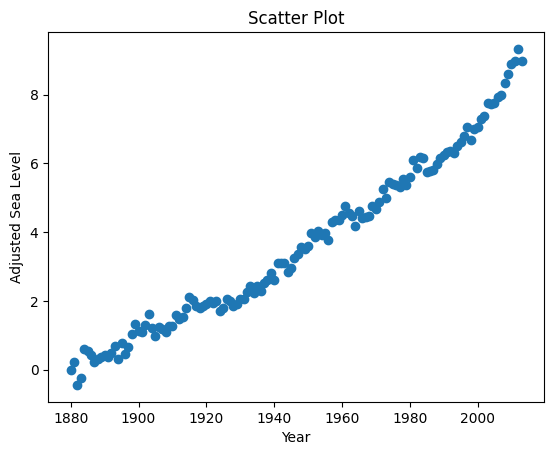

In [3]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.xlabel('Year')
plt.ylabel('Adjusted Sea Level')
plt.title('Scatter Plot')
plt.show()

## Predicting the sea level rise in 2050.

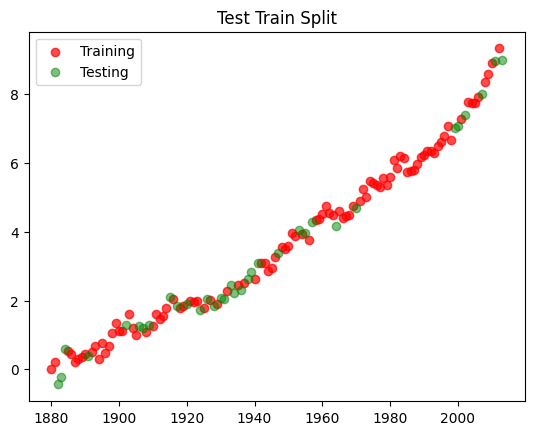

In [9]:
# Test train split for supervised learning
x_train, x_test, y_train, y_test = train_test_split(df.Year, df['CSIRO Adjusted Sea Level'])
# Visualize the test and train
plt.scatter(x_train, y_train, label = 'Training', color = 'r', alpha = .7)
plt.scatter(x_test, y_test, label = 'Testing', color = 'g', alpha = .5)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [16]:
# Creating the linear model
lm = LinearRegression()
lm.fit(x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

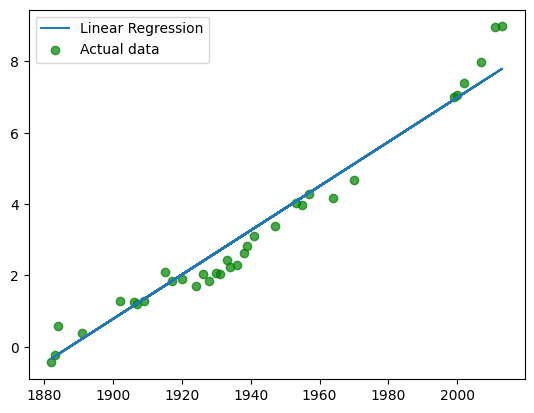

In [21]:
# Prediction
prediction = lm.predict(x_test.values.reshape(-1,1))
#Plot prediction
plt.plot(x_test, prediction, label = 'Linear Regression')
plt.scatter(x_test, y_test, label = 'Actual data', color = 'g', alpha = .7)
plt.legend()
plt.show()

In [28]:
# Predict the CSIRO Adjusted Sea Level in 2050.
predicted_2050 = lm.predict(np.array(2050).reshape(-1,1))[0]
predicted_2050

10.091092736466734

In [30]:
# Scoring the model
lm.score(x_test.values.reshape(-1,1), y_test.values)

0.9603689364110369

With the dataset we have this is a very good score although a little bit idealistic.